In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
#Loading diabetes dataset
df1 = pd.read_csv(r'D:\shravani\datavisualization\diabetes1.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pregnancies                        768 non-null    float64
 1   Glucose                            768 non-null    float64
 2   BloodPressure                      768 non-null    float64
 3   SkinThickness                      768 non-null    float64
 4   Insulin                            768 non-null    float64
 5   BMI                                768 non-null    float64
 6   DiabetesPedigreeFunction           768 non-null    float64
 7   Age                                768 non-null    float64
 8   Outcome                            768 non-null    int64  
 9   NEW_Glucose_low                    768 non-null    int64  
 10  NEW_Glucose_normal                 768 non-null    int64  
 11  NEW_Glucose_prediabetes            768 non-null    int64  

In [4]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose_low,...,NEW_Glucose_prediabetes,NEW_BMI_2 degree obesity,NEW_BMI_3 degree obesity,NEW_BMI_normal,NEW_BMI_overweight,NEW_BMI_underweight,NEW_AGE_old age,NEW_AGE_young age,NEW_BloodPressure_hypertension,NEW_BloodPressure_prehypertension
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.131868,0.665359,1.235294,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.637363,-0.056209,0.117647,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471,1,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.4,-0.691358,-0.387662,-0.857143,-2.108696,-0.472527,-0.537255,-0.470588,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.6,0.493827,-2.012662,0.857143,1.891304,1.175824,2.163399,0.235294,1,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
df = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.131868,0.665359,1.235294,1
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.637363,-0.056209,0.117647,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471,1
3,-0.4,-0.691358,-0.387662,-0.857143,-2.108696,-0.472527,-0.537255,-0.470588,0
4,-0.6,0.493827,-2.012662,0.857143,1.891304,1.175824,2.163399,0.235294,1


In [7]:
#Spliting the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
#Spliting the Data into Training, Development, and Testing Sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

Logistic Regression (Development Set):
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84       101
           1       0.71      0.57      0.63        53

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



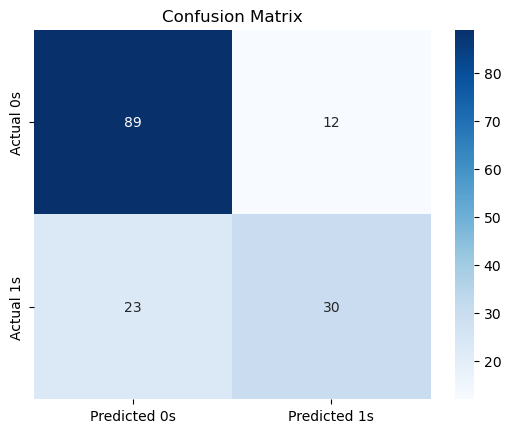

In [9]:
#k-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Hyperparameter Tuning using Grid Search for Logistic Regression
logistic_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                       'penalty': ['l2'],
                       'solver': ['liblinear', 'saga', 'lbfgs'],
                       'max_iter': [100, 200, 300]}
logistic_grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                                    param_grid=logistic_param_grid,
                                    cv=kf,
                                    scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

logistic_tuned_model = logistic_grid_search.best_estimator_
logistic_pred_dev = logistic_tuned_model.predict(X_dev)

#Displaying metrics
print("Logistic Regression (Development Set):")
print("Accuracy:", accuracy_score(y_dev, logistic_pred_dev))
print("Classification Report:\n", classification_report(y_dev, logistic_pred_dev))

sns.heatmap(confusion_matrix(y_dev, logistic_pred_dev), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'], 
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()


Decision Tree (Development Set):
Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       101
           1       0.57      0.51      0.54        53

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



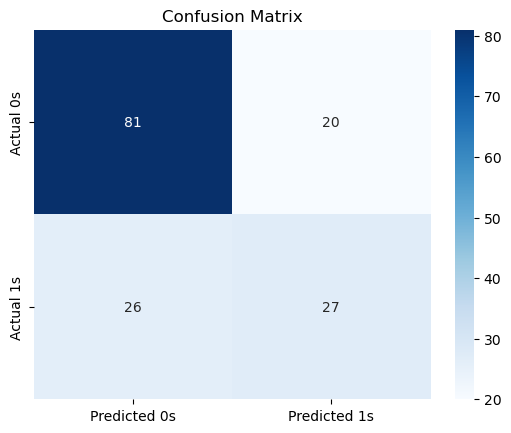

In [10]:
#Hyperparameter Tuning using Grid Search for Decision Tree
decision_tree_param_grid = {'max_depth': [None, 5, 10, 15, 20],
                            'min_samples_split': [2, 5, 10],
                            'min_samples_leaf': [1, 2, 4]}
decision_tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                         param_grid=decision_tree_param_grid,
                                         cv=kf,
                                         scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)

decision_tree_tuned_model = decision_tree_grid_search.best_estimator_
decision_tree_pred_dev = decision_tree_tuned_model.predict(X_dev)

#Displaying metrics
print("\nDecision Tree (Development Set):")
print("Accuracy:", accuracy_score(y_dev, decision_tree_pred_dev))
print("Classification Report:\n", classification_report(y_dev, decision_tree_pred_dev))

sns.heatmap(confusion_matrix(y_dev, decision_tree_pred_dev), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'], 
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()

Random Forest (Development Set):
Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       101
           1       0.72      0.49      0.58        53

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.76      0.75       154



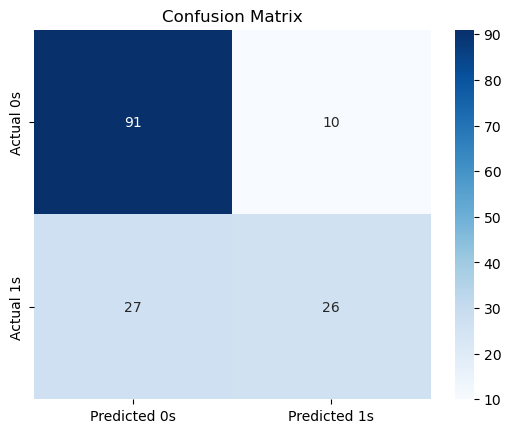

In [13]:
#Hyperparameter tuning using Grid Search for Random Forest Model
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=kf,
                              scoring='accuracy',
                              n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

rf_tuned_model = rf_grid_search.best_estimator_
rf_pred_dev = rf_tuned_model.predict(X_dev)

# Display metrics
print("Random Forest (Development Set):")
print("Accuracy:", accuracy_score(y_dev, rf_pred_dev))
print("Classification Report:\n", classification_report(y_dev, rf_pred_dev))

sns.heatmap(confusion_matrix(y_dev, rf_pred_dev), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()

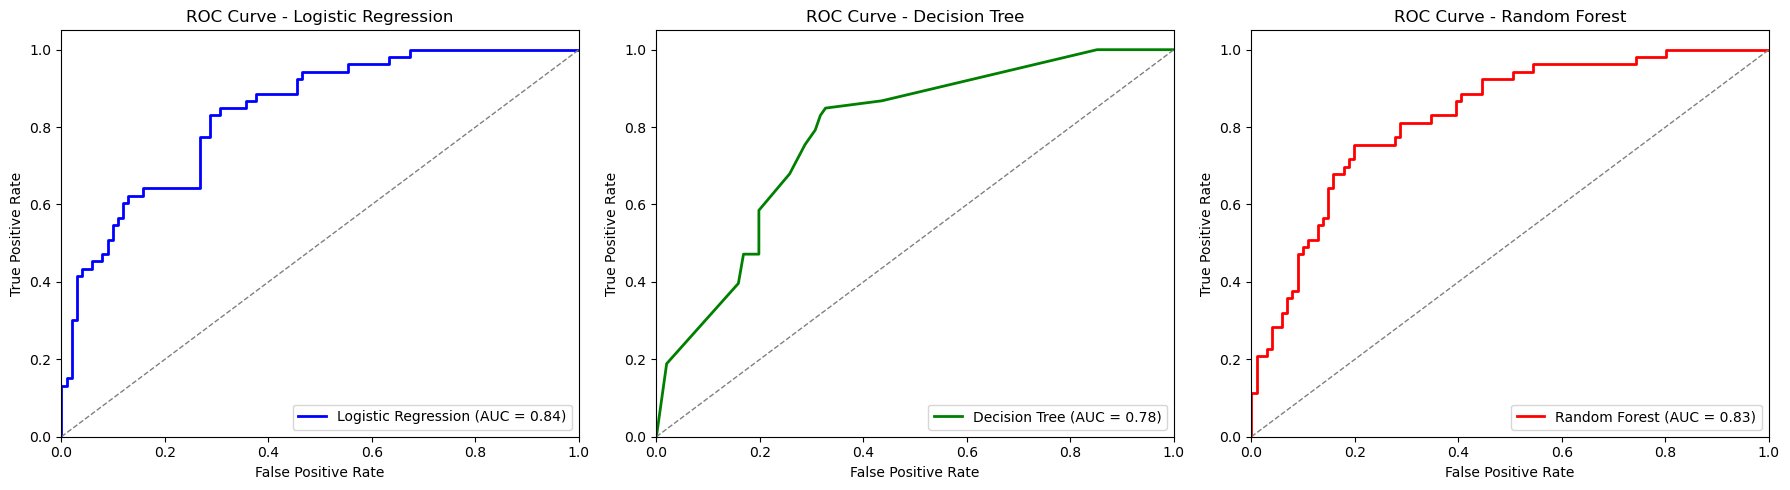

In [14]:
#Calculating predicted probabilities on the development set using the tuned models
logistic_pred_proba_dev = logistic_tuned_model.predict_proba(X_dev)[:, 1]
decision_tree_pred_proba_dev = decision_tree_tuned_model.predict_proba(X_dev)[:, 1]
random_forest_pred_proba_dev = rf_tuned_model.predict_proba(X_dev)[:, 1]

#Calculating ROC curve for logistic regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_dev, logistic_pred_proba_dev)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

#Calculating ROC curve for decision tree
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_dev, decision_tree_pred_proba_dev)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

#Calculating ROC curve for random forest
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_dev, random_forest_pred_proba_dev)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

#Plotting ROC curves
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.subplot(1, 3, 2)
plt.plot(fpr_decision_tree, tpr_decision_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_decision_tree)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")

plt.subplot(1, 3, 3)
plt.plot(fpr_random_forest, tpr_random_forest, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

The logistic regression model has highest accuracy at 77.27%, outperforming the decision tree's accuracy of 70.13% and Random Forest's accuracy of 75.97%. Moreover, the logistic regression model exhibits a higher area under the curve (AUC) at 0.84 compared to the decision tree's AUC of 0.78 & Random Forest's AUC of 0.83, indicating Logistic Regression Model's better ability to discriminate between positive and negative instances. The classification reports further suggests the logistic regression model's has higher precision, recall, and F1-scores across both classes. The logistic regression model has less false negative rate for diabetic patients compared to the decision tree model & Random Forest Model. Therefore, considering its robust performance across multiple metrics, retraining the logistic regression model on the combined training and development data and evaluating it on the test set can be a logical step to validate its efficacy in real-world scenarios.

Logistic Regression (Test Set):
Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154



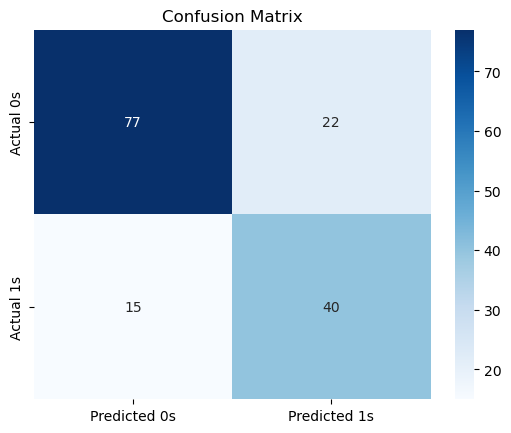

In [15]:
# Retraining Logistic Regression Model on Combined Training and Development Data
logistic_regression_selectedModel = logistic_tuned_model
logistic_regression_selectedModel.fit(X_train_dev, y_train_dev)

# Evaluating Logistic Regression Model on Test Data
logistic_pred_test = logistic_regression_selectedModel.predict(X_test)
print("Logistic Regression (Test Set):")
print("Accuracy:", accuracy_score(y_test, logistic_pred_test))
print("Classification Report:\n", classification_report(y_test, logistic_pred_test))

sns.heatmap(confusion_matrix(y_test, logistic_pred_test), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'], 
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()